In [56]:
import sys
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr,ttest_ind,mannwhitneyu
from sklearn.metrics import mean_squared_error
rcParams['pdf.fonttype'] = 42

from PyPDF2 import PdfMerger



# Import Pacakages

In [2]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot


# Predicting cell type deconvolution

### Please note: In this result, we used tangram function 'tg.project_cell_annotations' as deconvolution result;
### you can also use function 'tg.count_cell_annotations' to deconvolute the spots.

### Please install the version described in README.md file. We will update the code for new version tools.

In [3]:
### please add the your SpatialBenchmarking dir into the python path 
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot

### for Cell2location, Stereoscope, Tangram, DestVI, you must have .h5ad files as input.

RNA_h5ad = 'ExampleData/Simulated_STARmap/starmap_sc_rna.h5ad'
Spatial_h5ad = 'ExampleData/Simulated_STARmap/starmap_spatial.h5ad'
celltype_key = 'celltype'
output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

test = DeconvolutionSpot.Deconvolutions(RNA_h5ad = RNA_h5ad, Spatial_h5ad = Spatial_h5ad, celltype_key = celltype_key, output_path = output_path)
Methods = ['Cell2location', 'Stereoscope','Tangram', 'DestVI']
Result = test.Dencon(Methods)



Traceback (most recent call last):
  File "/root/repositories/SpatialBenchmarking/Codes/Deconvolution/Cell2location_pipeline.py", line 12, in <module>
    import cell2location
ModuleNotFoundError: No module named 'cell2location'
Traceback (most recent call last):
  File "/root/repositories/SpatialBenchmarking/Codes/Deconvolution/Stereoscope_pipeline.py", line 5, in <module>
    import scvi
ModuleNotFoundError: No module named 'scvi'
Traceback (most recent call last):
  File "/root/repositories/SpatialBenchmarking/Codes/Deconvolution/Tangram_pipeline.py", line 9, in <module>
    import tangram as tg
ModuleNotFoundError: No module named 'tangram'
Traceback (most recent call last):
  File "/root/repositories/SpatialBenchmarking/Codes/Deconvolution/DestVI_pipeline.py", line 5, in <module>
    import scvi
ModuleNotFoundError: No module named 'scvi'


In [4]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot
### for SpatialDWLS, RCTD, Seurat, SPOTlight, you must have .h5seurat files as input.
### for SpatialDWLS, you must add my_python_path.

RNA_h5Seurat = 'ExampleData/Simulated_STARmap/starmap_sc_rna.h5seurat'
Spatial_h5Seurat = 'ExampleData/Simulated_STARmap/starmap_spatial.h5seurat'
celltype_key = 'celltype'
my_python_path = '/home/qukun/xuhao/miniconda3/envs/cellpymc/bin/python'
output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

# set the parameter k.filter=50=30 when use Seurat
test = DeconvolutionSpot.Deconvolutions(RNA_h5Seurat = RNA_h5Seurat, Spatial_h5Seurat = Spatial_h5Seurat, celltype_key = celltype_key, python_path = my_python_path, output_path = output_path)
Methods = ['SpatialDWLS','RCTD', 'Seurat', 'SPOTlight']
Result = test.Dencon(Methods)


sh: 1: Rscript: not found
sh: 1: Rscript: not found
sh: 1: Rscript: not found
sh: 1: Rscript: not found


In [5]:
sys.path.append('./')
import Benchmarking.DeconvolutionSpot as DeconvolutionSpot

### for STRIDE, have count matrix files as input.

RNA_file = 'ExampleData/Simulated_STARmap/starmap_sc_rna.tsv'
Spatial_file = 'ExampleData/Simulated_STARmap/starmap_spatial.tsv'
celltype_file = 'ExampleData/Simulated_STARmap/starmap_sc_rna_celltype.tsv'
output_path = 'FigureData/Figure4/Dataset10_STARmap/Result_STARmap/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

test = DeconvolutionSpot.Deconvolutions(RNA_file = RNA_file, Spatial_file = Spatial_file, celltype_file = celltype_file, output_path = output_path)
Methods = ['STRIDE']
Result = test.Dencon(Methods)


Simulated_STARmap
ExampleData/Simulated_STARmap/starmap_sc_rna_celltype.tsv


Codes/Deconvolution/STRIDE_pipeline.sh: 12: STRIDE: not found


# Analyse results

In [202]:
# !cd ../CoDi && ./deconv.sh

/root/repositories/CoDi/core/CoDi.py:188: UserWarning: Spatial coordinates not found. Labels expected in:                 .obsm["spatial"] or
                 .obsm["X_spatial"] or
                 .obsm["spatial_stereoseq"]
  warnings.warn(
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
2024-10-23 23:19:33,318 __main__     INFO     Using 430 unique single cell marker genes that exist in ST dataset (200 per cell type)
2024-10-23 23:19:33,319 __main__     INFO     Calculation of marker genes took 12.56
2024-10-23 23:19:34,515 __main__     INFO     Starting parallel per cell calculation of distances.
2024-10-23 23:19:37,388 __main__     INFO     CoDi execution took: 20.694556951522827s
... storing 'CoDi_dist' as categorical
... storing 'CoDi' as categorical
2024-10-23 23:19:37,419 __main__     INFO     Total execution time: 20.73s
/root/mi

# SpaOTsc, novoSpaRc, Tangram result

In [33]:
sc_rna_meta = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Rawdata/starmap_sc_rna_celltype.tsv', sep = '\t', header = None, index_col = 0)

tangram_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Tangram_result.txt',index_col=0)
tangram_results = tangram_results.loc[:,np.unique(tangram_results.columns)]

spa_map = np.load('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SpaOTsc_alignment.npy')
spa_results=pd.DataFrame(np.zeros((spa_map.shape[1],len(np.unique(sc_rna_meta[1])))),columns=np.unique(sc_rna_meta[1]))
spa_pro_results = pd.DataFrame(np.zeros((len(spa_results.index), len(np.unique(spa_results.columns)))),columns=np.unique(spa_results.columns))
for i,l in enumerate(np.argmax(spa_map, axis=1)):
    spa_results.loc[l,sc_rna_meta.iloc[i,0]] += 1

novo_map = np.load('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/novoSpaRc_alignment.npy')
novo_results=pd.DataFrame(np.zeros((novo_map.shape[1],len(np.unique(sc_rna_meta[1])))),columns=np.unique(sc_rna_meta[1]))
novo_pro_results = pd.DataFrame(np.zeros((len(novo_results.index), len(np.unique(novo_results.columns)))),columns=np.unique(novo_results.columns))
for i,l in enumerate(np.argmax(novo_map, axis=1)):
    novo_results.loc[l,sc_rna_meta.iloc[i,0]] += 1



# Cell2location, RCTD, Seurat, Stereoscope, SPOTlight, SpatialDWLS, DestVI, DSTG, STRIDE result

In [34]:
cell2loc_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Cell2location_result.txt',index_col=0)
cell2loc_results.index = np.arange(len(cell2loc_results))
cell2loc_results.columns = [c.split('q05cell_abundance_w_sf_')[1] for c in cell2loc_results.columns]
cell2loc_results = cell2loc_results.loc[:,np.unique(cell2loc_results.columns)]

RCTD_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/RCTD_result.txt',index_col=0)
RCTD_results.index = np.arange(len(RCTD_results))
RCTD_results = RCTD_results.loc[:,np.unique(RCTD_results.columns)]
RCTD_results.columns = tangram_results.columns

spatialdwls_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SpatialDWLS_result.txt',index_col=0)
spatialdwls_results.index = np.arange(len(spatialdwls_results))
spatialdwls_results = spatialdwls_results.iloc[:,1:]
spatialdwls_results = spatialdwls_results.loc[:,np.unique(spatialdwls_results.columns)]

stereo_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Stereoscope_result.txt',index_col=0)
stereo_results.index = np.arange(len(stereo_results))
stereo_results = stereo_results.loc[:,np.unique(stereo_results.columns)]
stereo_results.columns = tangram_results.columns
stereo_results = (stereo_results.T/stereo_results.sum(axis=1)).T
stereo_results = stereo_results.fillna(0)

destvi_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/DestVI_result.txt',index_col=0)
destvi_results.index = np.arange(len(destvi_results))
destvi_results = destvi_results.loc[:,np.unique(destvi_results.columns)]
destvi_results.columns = tangram_results.columns
destvi_results = (destvi_results.T/destvi_results.sum(axis=1)).T
destvi_results = destvi_results.fillna(0)

spotlight_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/SPOTlight_result.txt',index_col=0)
spotlight_results.index = np.arange(len(spotlight_results))
spotlight_results = spotlight_results.loc[:,np.unique(spotlight_results.columns)]
spotlight_results.columns = tangram_results.columns
spotlight_results = (spotlight_results.T/spotlight_results.sum(axis=1)).T
spotlight_results = spotlight_results.fillna(0)

stride_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/STRIDE_result.txt',index_col=0,sep='\t')
stride_results.index = np.arange(len(stride_results))
stride_results = stride_results.loc[:,np.unique(stride_results.columns)]
stride_results.columns = tangram_results.columns
stride_results = (stride_results.T/stride_results.sum(axis=1)).T
stride_results = stride_results.fillna(0)

seurat_results = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/Seurat_result.txt',index_col=0)
seurat_results = seurat_results.iloc[:,1:-1]
seurat_results = seurat_results.loc[:,np.unique(seurat_results.columns)]
seurat_results.columns = tangram_results.columns

def get_dstg_results(results_path,celltype=None):
    results = pd.read_csv(results_path + '/DSTG_result.txt',sep=',',header=None)
    label = pd.read_csv(results_path + '/Label.csv',sep=',')
    results.columns = label.columns
    if celltype is not None:
        results.loc[:,np.setdiff1d(celltype,results.columns)] = 0
    results = results.loc[:,np.unique(results.columns)]
    return results
dstg_results = get_dstg_results('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/')
dstg_results.columns = tangram_results.columns


In [36]:
codi_adata = sc.read('FigureData/Figure4/Dataset10_STARmap/starmap_spatial_sparse_CoDi_KLD.h5ad')
display(codi_adata)
codi_adata.obsm['probabilities_contrastive']

AnnData object with n_obs × n_vars = 189 × 882
    obs: 'CoDi_dist', 'CoDi_confidence_dist', 'CoDi_contrastive', 'CoDi_confidence_contrastive', 'CoDi', 'CoDi_confidence'
    obsm: 'probabilities', 'probabilities_contrastive', 'probabilities_dist'

,Astro,Endo,Excitatory L2/3,Excitatory L4,Excitatory L5,Excitatory L6,Inhibitory Other,Inhibitory Pvalb,Inhibitory Sst,Inhibitory Vip,Micro,Neuron Other,Olig,Other,Smc
cell_id,,,,,,,,,,,,,,,
0,0.144749,0.062499,0.138787,0.073076,0.058771,0.026892,0.061338,0.028909,0.087365,0.072253,0.050469,0.018608,0.034973,0.053365,0.087945
1,0.210180,0.067306,0.088282,0.061396,0.061795,0.029711,0.049705,0.027707,0.072101,0.053780,0.052427,0.014534,0.063898,0.050782,0.096395
2,0.067577,0.055291,0.028704,0.028066,0.054301,0.028436,0.044825,0.035435,0.020279,0.069945,0.031536,0.014621,0.398654,0.082789,0.039542
3,0.321156,0.036713,0.028717,0.058004,0.039643,0.044372,0.049189,0.054875,0.014294,0.041538,0.027110,0.014090,0.154119,0.070449,0.045731
4,0.079818,0.078266,0.144391,0.054957,0.114527,0.016172,0.039196,0.025293,0.075542,0.067118,0.051797,0.019237,0.060607,0.057203,0.115876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.041840,0.050672,0.061950,0.021136,0.040662,0.023053,0.141785,0.133269,0.083406,0.155074,0.047990,0.027640,0.072399,0.050683,0.048442
185,0.061298,0.085294,0.384036,0.032361,0.056383,0.012222,0.032233,0.017303,0.066119,0.050633,0.039703,0.022085,0.037118,0.029266,0.073944
186,0.065193,0.062985,0.499736,0.037507,0.037395,0.011407,0.028739,0.016678,0.048963,0.022336,0.034655,0.023870,0.025579,0.025270,0.059685


In [37]:
tangram_results = (tangram_results.T/tangram_results.sum(axis=1)).T
seurat_results = (seurat_results.T/seurat_results.sum(axis=1)).T
cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
novo_results = (novo_results.T/novo_results.sum(axis=1)).T
spa_results = (spa_results.T/spa_results.sum(axis=1)).T

tangram_results = tangram_results.fillna(0)
seurat_results = seurat_results.fillna(0)
cell2loc_results = cell2loc_results.fillna(0)
novo_results = novo_results.fillna(0)
spa_results = spa_results.fillna(0)

tangram_results = tangram_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
seurat_results = seurat_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
RCTD_results = RCTD_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
cell2loc_results = cell2loc_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
stereo_results = stereo_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
destvi_results = destvi_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spotlight_results = spotlight_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spatialdwls_results = spatialdwls_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
dstg_results = dstg_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
stride_results = stride_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
novo_results = novo_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
spa_results = spa_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])

gd_results = pd.read_table('FigureData/Figure4/Dataset10_STARmap/Simulated_STARmap/combined_spot_clusters.txt', sep = '\t', header = 0, index_col = 0)
gd_results.columns = ['Astro', 'Endo', 'Excitatory L2/3', 'Excitatory L4', 'Excitatory L5', 'Excitatory L6', 'HPC', 'Micro', 'Npy'
                     , 'Olig', 'Other', 'Inhibitory Pvalb', 'Smc', 'Inhibitory Sst', 'Inhibitory Vip']
gd_results = (gd_results.T/gd_results.sum(axis=1)).T

gd_results = gd_results.drop(columns=['Other','Npy', 'HPC'])
gd_results = gd_results.loc[:,np.unique(gd_results.columns)]

gd_results = gd_results.fillna(0)

gd_loc = pd.read_csv('FigureData/Figure4/Dataset10_STARmap/Simulated_STARmap/combined_Locations.txt',sep='\t')
codi_results = codi_adata.obsm['probabilities_contrastive']
codi_results = codi_results.loc[:, cell2loc_results.columns]  # Keep only columns that are present in other solutions


codi_results

,Astro,Endo,Excitatory L2/3,Excitatory L4,Excitatory L5,Excitatory L6,Inhibitory Pvalb,Inhibitory Sst,Inhibitory Vip,Micro,Olig,Smc
cell_id,,,,,,,,,,,,
0,0.144749,0.062499,0.138787,0.073076,0.058771,0.026892,0.028909,0.087365,0.072253,0.050469,0.034973,0.087945
1,0.210180,0.067306,0.088282,0.061396,0.061795,0.029711,0.027707,0.072101,0.053780,0.052427,0.063898,0.096395
2,0.067577,0.055291,0.028704,0.028066,0.054301,0.028436,0.035435,0.020279,0.069945,0.031536,0.398654,0.039542
3,0.321156,0.036713,0.028717,0.058004,0.039643,0.044372,0.054875,0.014294,0.041538,0.027110,0.154119,0.045731
4,0.079818,0.078266,0.144391,0.054957,0.114527,0.016172,0.025293,0.075542,0.067118,0.051797,0.060607,0.115876
...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.041840,0.050672,0.061950,0.021136,0.040662,0.023053,0.133269,0.083406,0.155074,0.047990,0.072399,0.048442
185,0.061298,0.085294,0.384036,0.032361,0.056383,0.012222,0.017303,0.066119,0.050633,0.039703,0.037118,0.073944
186,0.065193,0.062985,0.499736,0.037507,0.037395,0.011407,0.016678,0.048963,0.022336,0.034655,0.025579,0.059685


In [38]:
codi_results.columns

Index(['Astro', 'Endo', 'Excitatory L2/3', 'Excitatory L4', 'Excitatory L5',
       'Excitatory L6', 'Inhibitory Pvalb', 'Inhibitory Sst', 'Inhibitory Vip',
       'Micro', 'Olig', 'Smc'],
      dtype='object')

# Plot celltype distribution

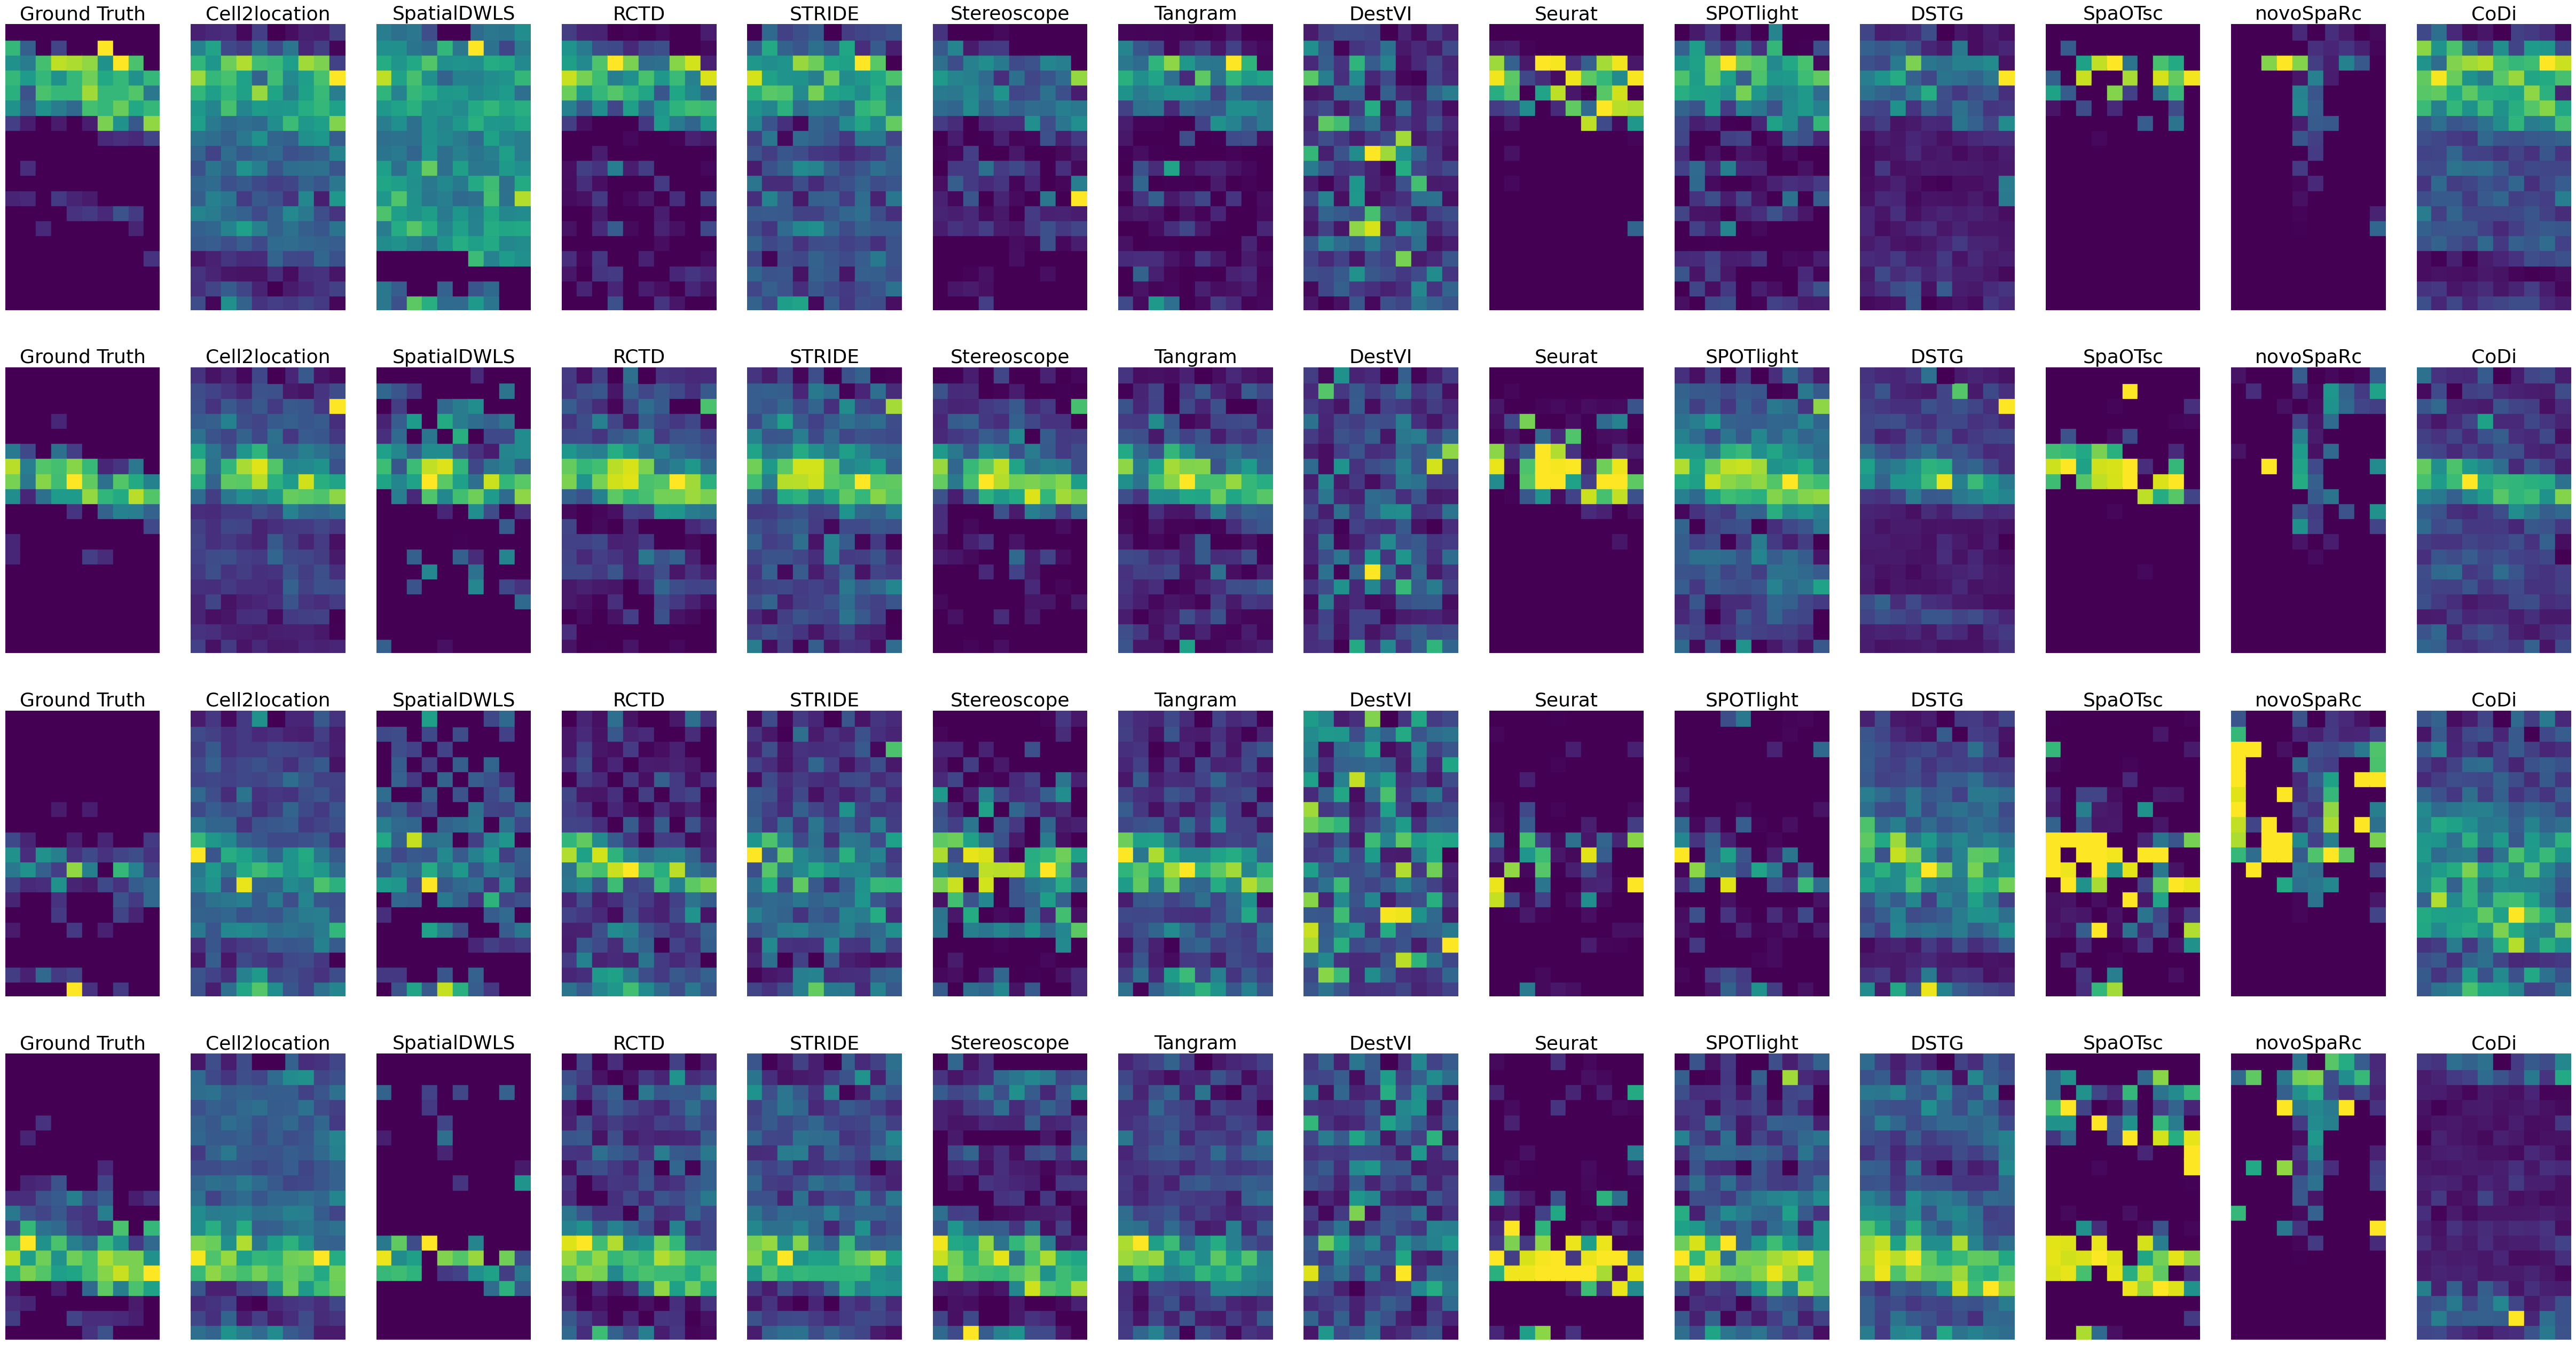

In [87]:

fontsize = 26
list_results = [gd_results, cell2loc_results, spatialdwls_results, RCTD_results, stride_results, 
                stereo_results, tangram_results, destvi_results, seurat_results, spotlight_results,
                dstg_results, spa_results, novo_results, codi_results]
tools = ['Ground Truth', 'Cell2location', 'SpatialDWLS', 'RCTD', 'STRIDE', 'Stereoscope', 'Tangram', 'DestVI', 'Seurat',
                 'SPOTlight', 'DSTG', 'SpaOTsc', 'novoSpaRc', 'CoDi']
fig,axes = plt.subplots(ncols=14,nrows=4,figsize=(62,32))
for fig_ind, c_ind in enumerate([2,3,4,5]):
    for fig_col, (tool, result) in enumerate(zip(tools, list_results)):
        axes[fig_ind,fig_col].scatter(x=gd_loc['x'],y=gd_loc['y'],c=result.iloc[:,c_ind],s=500,marker='s')
        axes[fig_ind,fig_col].scatter(x=5,y=18,c=0,s=500,marker='s')
        axes[fig_ind,fig_col].set_xlim(-0.5,9.5)
        axes[fig_ind,fig_col].set_ylim(-0.5,18.5)
        axes[fig_ind,fig_col].axis('off')
        axes[fig_ind,fig_col].set_title(tool, fontsize=fontsize)
   
plt.savefig('FigureData/Figure4/Dataset10_STARmap/Result_STARmap/starmap_Excitatory_ALL.pdf',bbox_inches='tight',dpi=300)


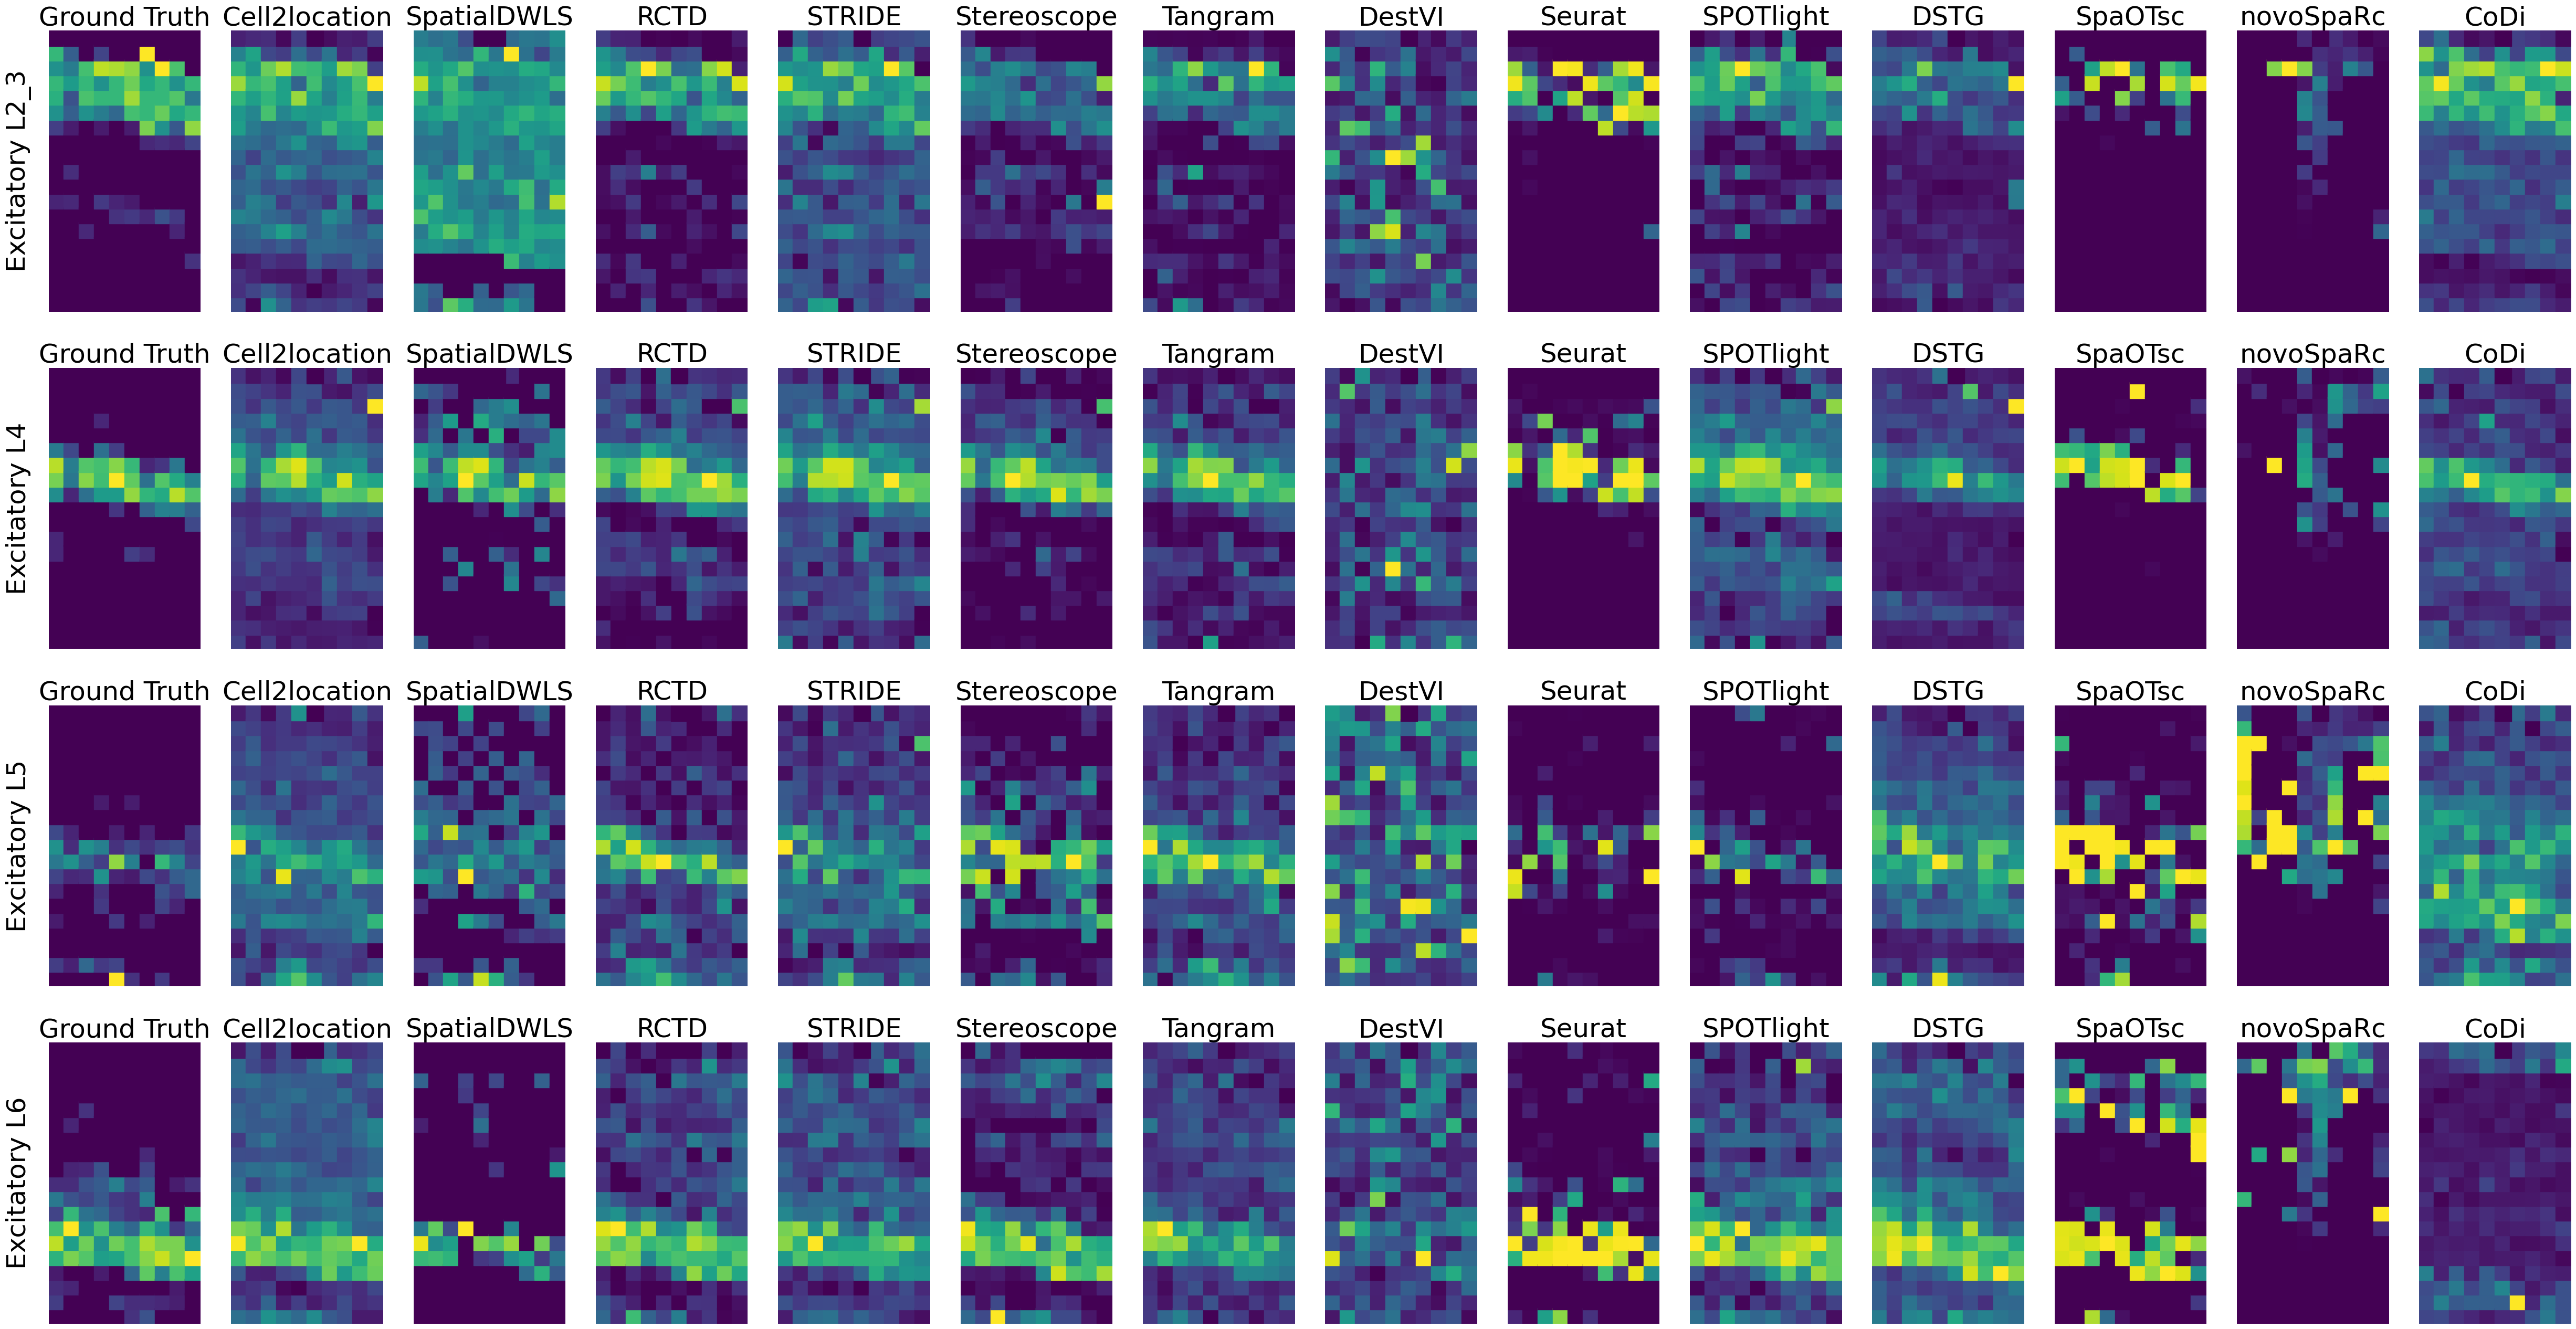

In [102]:
import matplotlib.pyplot as plt

fontsize = 36
list_results = [gd_results, cell2loc_results, spatialdwls_results, RCTD_results, stride_results, 
                stereo_results, tangram_results, destvi_results, seurat_results, spotlight_results,
                dstg_results, spa_results, novo_results, codi_results]
tools = ['Ground Truth', 'Cell2location', 'SpatialDWLS', 'RCTD', 'STRIDE', 'Stereoscope', 'Tangram', 'DestVI', 'Seurat',
         'SPOTlight', 'DSTG', 'SpaOTsc', 'novoSpaRc', 'CoDi']

# Subtitles for each row
subtitles = ['Excitatory L2_3', 'Excitatory L4', 'Excitatory L5', 'Excitatory L6']

# Creating subplots with specified figure size
fig, axes = plt.subplots(ncols=14, nrows=4, figsize=(62, 32))

# Loop over rows and columns
for fig_ind, (subtitle, c_ind) in enumerate(zip(subtitles, [2, 3, 4, 5])):  
    # Add subtitle to the beginning of each row
    axes[fig_ind, 0].annotate(subtitle, xy=(-0.2, 0.5), xytext=(-axes[fig_ind, 0].get_position().width, 0),
                              xycoords='axes fraction', textcoords='offset points', fontsize=fontsize, 
                              rotation=90, ha='center', va='center')
    
    for fig_col, (tool, result) in enumerate(zip(tools, list_results)):
        # Plotting data for each tool
        axes[fig_ind, fig_col].scatter(x=gd_loc['x'], y=gd_loc['y'], c=result.iloc[:, c_ind], s=500, marker='s')
        axes[fig_ind, fig_col].scatter(x=5, y=18, c=0, s=500, marker='s')
        
        # Setting axis properties
        axes[fig_ind, fig_col].set_xlim(-0.5, 9.5)
        axes[fig_ind, fig_col].set_ylim(-0.5, 18.5)
        axes[fig_ind, fig_col].axis('off')
        
        # Setting title for each subplot
        axes[fig_ind, fig_col].set_title(tool, fontsize=fontsize)

# Saving the figure to a PDF
plt.savefig('starmap_Excitatory_ALL.png', bbox_inches='tight', dpi=300)


In [97]:
def ssim(im1,im2,M=1):
    im1, im2 = im1/im1.max(), im2/im2.max()
    mu1 = im1.mean()
    mu2 = im2.mean()
    sigma1 = np.sqrt(((im1 - mu1) ** 2).mean())
    sigma2 = np.sqrt(((im2 - mu2) ** 2).mean())
    sigma12 = ((im1 - mu1) * (im2 - mu2)).mean()
    k1, k2, L = 0.01, 0.03, M
    C1 = (k1*L) ** 2
    C2 = (k2*L) ** 2
    C3 = C2/2
    l12 = (2*mu1*mu2 + C1)/(mu1 ** 2 + mu2 ** 2 + C1)
    c12 = (2*sigma1*sigma2 + C2)/(sigma1 ** 2 + sigma2 ** 2 + C2)
    s12 = (sigma12 + C3)/(sigma1*sigma2 + C3)
    ssim = l12 * c12 * s12
    return ssim

def rmse(x1,x2):
    return mean_squared_error(x1,x2,squared=False)
def mae(x1,x2):
    return np.mean(np.abs(x1-x2))

from collections.abc import Iterable
def compare_results(gd,result_list,metric='pcc',columns=None,axis=1):
    if metric=='pcc':
        func = pearsonr
        r_ind = 0
    if metric=='mae':
        func = mae
        r_ind = None
    if metric=='jsd':
        func = jensenshannon
        r_ind = None
    if metric=='rmse':
        func = rmse
        r_ind = None
    if metric=='ssim':
        func = ssim
        r_ind = None
    if isinstance(result_list, pd.DataFrame):
        c_list = []
        if axis == 1:
            print('axis: ',1)
            for i,c in enumerate(gd.columns):
                r = func(gd.iloc[:,i].values, np.clip(result_list.iloc[:,i],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        else:
            print('axis: ',0)
            for i,c in enumerate(gd.index):
                r = func(gd.iloc[i,:].values, np.clip(result_list.iloc[i,:],0,1))
                if isinstance(result_list, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
        df = pd.DataFrame(c_list,index=gd.columns,columns=columns)
    else:
        df_list = []
        for res in result_list:
            c_list = []
            if axis == 1:
                for i,c in enumerate(gd.columns):
                    r = func(gd.iloc[:,i].values, np.clip(res.iloc[:,i],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.columns)
            else:
                for i,c in enumerate(gd.index):
                    r = func(gd.iloc[i,:].values, np.clip(res.iloc[i,:],0,1))
                    if isinstance(res, Iterable):
                        if r_ind is not None:
                            r = r[r_ind]
                    c_list.append(r)
                df_tmp = pd.DataFrame(c_list,index=gd.index)
            df_list.append(df_tmp)
        df = pd.concat(df_list,axis=1)
        df.columns = columns
    return df


In [98]:
starmap_spots_pcc = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=0,
    metric='pcc'
)
starmap_clusters_pcc = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=1,
    metric='pcc'
)
starmap_spots_ssim = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=0,
    metric='ssim'
)
starmap_clusters_ssim = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=1,
    metric='ssim'
)
starmap_spots_rmse = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=0,
    metric='rmse'
)
starmap_clusters_rmse = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=1,
    metric='rmse'
)
starmap_spots_jsd = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=0,
    metric='jsd'
)
starmap_clusters_jsd = compare_results(
    gd_results,
    [RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results,dstg_results,stride_results,spa_results,novo_results, codi_results],
    columns = ['RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI','DSTG','STRIDE','SpaOTsc','NovoSparc', 'CoDi'],
    axis=1,
    metric='jsd'
)



/tmp/ipykernel_10490/3939850244.py:73: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = func(gd.iloc[i,:].values, np.clip(res.iloc[i,:],0,1))
/tmp/ipykernel_10490/3939850244.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = func(gd.iloc[:,i].values, np.clip(res.iloc[:,i],0,1))
/tmp/ipykernel_10490/3939850244.py:2: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1/im1.max(), im2/im2.max()
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scipy/spatial/distance.py:1261: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scipy/spatial/distance.py:1262: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scipy/spatial/distance.py:1262: RuntimeWarning: divide by

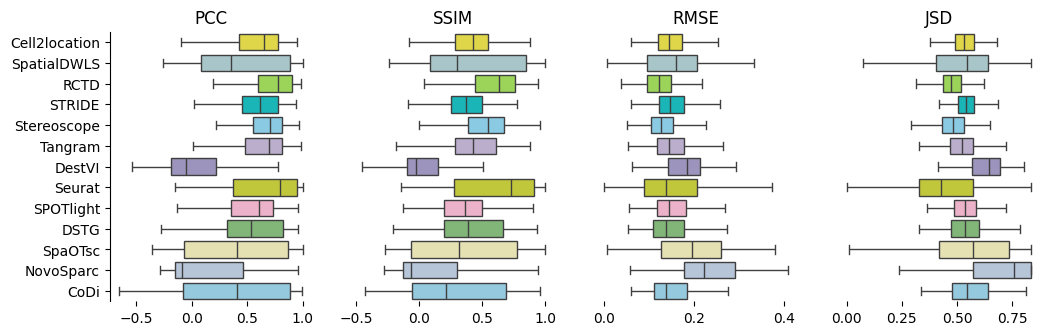

In [99]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12, 3.5))
order = ['Cell2location', 'SpatialDWLS', 'RCTD', 'STRIDE', 'Stereoscope', 'Tangram', 'DestVI', 'Seurat', 'SPOTlight', 'DSTG', 'SpaOTsc', 'NovoSparc', 'CoDi']
colors = ["#9de846", '#F9EC31', "#BBA8D1", "#D6DE23", "#7BD1F1", "#F5A8C7", "#A2CBCF", "#988DC3", "#79c06e", '#00CED1', "#EEE8AA", "#B0C4DE", "#87CEEB"]

sns.boxplot(data=starmap_spots_pcc, order=order, palette=colors, ax=axes[0], orient='h', showfliers=False)
axes[0].set_title('PCC')
sns.boxplot(data=starmap_spots_ssim, order=order, palette=colors, ax=axes[1], orient='h', showfliers=False)
axes[1].set_title('SSIM')
sns.boxplot(data=starmap_spots_rmse, order=order, palette=colors, ax=axes[2], orient='h', showfliers=False)
axes[2].set_title('RMSE')
sns.boxplot(data=starmap_spots_jsd, order=order, palette=colors, ax=axes[3], orient='h', showfliers=False)
axes[3].set_title('JSD')

# Remove y-ticks and borders (spines) for all axes except the first column
for ax in axes:
    if ax != axes[0]:  # Only keep y-ticks for the first plot
        ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(ax == axes[0])  # Only keep left spine for the first plot

plt.savefig(os.path.join('starmap_all_metrics_single_row.png'), dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_10490/1042258027.py:4: UserWarning: 
The palette list has fewer values (11) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=starmap_spots_pcc,order=order,palette=colors,ax=axes[0,0],orient='h', showfliers = False,showmeans=True)
/tmp/ipykernel_10490/1042258027.py:6: UserWarning: 
The palette list has fewer values (11) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=starmap_spots_ssim,order=order,palette=colors,ax=axes[0,1],orient='h', showfliers = False,showmeans=True)
/tmp/ipykernel_10490/1042258027.py:8: UserWarning: 
The palette list has fewer values (11) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=starmap_spots_rmse,order=order,palette=colors,ax=axes[0,2],orient='h', showfliers = False,showmeans=True)
/tmp/ipykernel_10490/1042258027.py:10: UserWarning: 
The palette list has fewer values (11) than needed (13) and will cycle, 

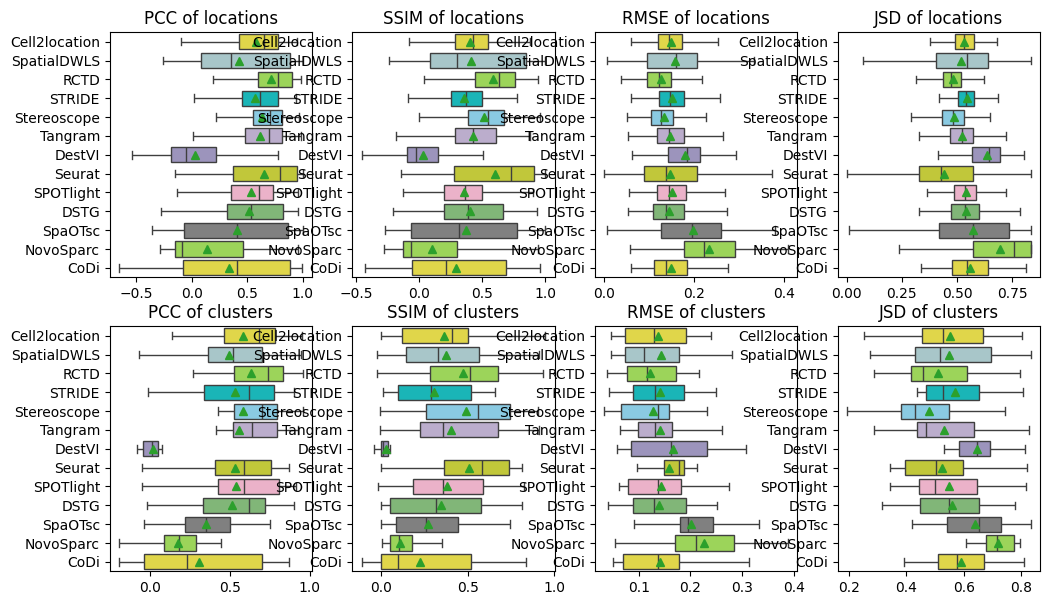

In [95]:
fig,axes = plt.subplots(ncols=4,nrows=2,figsize=(12,7))
order = ['Cell2location','SpatialDWLS','RCTD','STRIDE','Stereoscope','Tangram','DestVI', 'Seurat', 'SPOTlight','DSTG','SpaOTsc','NovoSparc', 'CoDi']
colors = ["#9de846", '#F9EC31', "#BBA8D1","#D6DE23", "#7BD1F1", "#F5A8C7",  "#A2CBCF", "#988DC3", "#79c06e",'#00CED1','gray']
sns.boxplot(data=starmap_spots_pcc,order=order,palette=colors,ax=axes[0,0],orient='h', showfliers = False,showmeans=True)
axes[0,0].set_title('PCC of locations')
sns.boxplot(data=starmap_spots_ssim,order=order,palette=colors,ax=axes[0,1],orient='h', showfliers = False,showmeans=True)
axes[0,1].set_title('SSIM of locations')
sns.boxplot(data=starmap_spots_rmse,order=order,palette=colors,ax=axes[0,2],orient='h', showfliers = False,showmeans=True)
axes[0,2].set_title('RMSE of locations')
sns.boxplot(data=starmap_spots_jsd,order=order,palette=colors,ax=axes[0,3],orient='h', showfliers = False,showmeans=True)
axes[0,3].set_title('JSD of locations')

sns.boxplot(data=starmap_clusters_pcc,order=order,palette=colors,ax=axes[1,0],orient='h', showfliers = False,showmeans=True)
axes[1,0].set_title('PCC of clusters')
sns.boxplot(data=starmap_clusters_ssim,order=order,palette=colors,ax=axes[1,1],orient='h', showfliers = False,showmeans=True)
axes[1,1].set_title('SSIM of clusters')
sns.boxplot(data=starmap_clusters_rmse,order=order,palette=colors,ax=axes[1,2],orient='h', showfliers = False,showmeans=True)
axes[1,2].set_title('RMSE of clusters')
sns.boxplot(data=starmap_clusters_jsd,order=order,palette=colors,ax=axes[1,3],orient='h', showfliers = False,showmeans=True)
axes[1,3].set_title('JSD of clusters')
plt.savefig(os.path.join('FigureData/Figure4/Dataset10_STARmap/Result_STARmap','starmap_all_metrics.pdf'),dpi=300,bbox_inches='tight')
plt.show()
# plt.close()

In [213]:
adata10 = sc.read_h5ad('../CoDi/dataset10_st_CoDi_KLD.h5ad')
adata10

AnnData object with n_obs × n_vars = 1549 × 1020
    obs: 'CoDi_dist', 'CoDi_confidence_dist', 'CoDi', 'CoDi_confidence'
    obsm: 'probabilities_dist', 'spatial'

In [214]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
cluster_palette = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#aa40fc", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", \
                  "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247", "#d15252", \
                  "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#ef476f", \
                  "#ffd166","#06d6a0","#118ab2","#073b4c", "#fbf8cc","#fde4cf", \
                  "#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5", \
                  '#8359A3', '#5e503f', '#33CC99', '#F2C649', '#B94E48', '#0095B7', \
                  '#FF681F', '#e0aaff', '#FED85D', '#0a0908', '#C32148', '#98f5e1', \
                  "#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", \
                  "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87", \
                  "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80", \
                  "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", \
                  "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F", \
                  "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09", \
                  "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66", \
                  "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C", \
                  "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81", \
                  "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00", \
                  "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700", \
                  "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329", \
                  "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C", \
                  "#00B7FF", "#004DFF", "#00FFFF", "#826400", "#580041", "#FF00FF", "#00FF00", "#C500FF", \
                  "#B4FFD7", "#FFCA00", "#969600", "#B4A2FF", "#C20078", "#0000C1", "#FF8B00", "#FFC8FF", \
                  "#666666", "#FF0000", "#CCCCCC", "#009E8F", "#D7A870", "#8200FF", "#960000", "#BBFF00", \
                  "#FFFF00", "#006F00"]


def plot_spatial(
    adata, annotation, ax: Axes, spot_size: float, palette=cluster_palette, title: str = "", legend='auto'
):
    """
    Scatter plot in spatial coordinates.

    Parameters:
        - adata (AnnData): Annotated data object which represents the sample
        - annotation (str): adata.obs column used for grouping
        - ax (Axes): Axes object used for plotting
        - spot_size (int): Size of the dot that represents a cell. We are passing it as a diameter of the spot, while
                the plotting library uses radius therefore it is multiplied by 0.5
        - palette (dict): Dictionary that represents a mapping between annotation categories and colors
        - title (str): Title of the figure

    """
    s = spot_size * 0.5
    data = adata
    ax = sns.scatterplot(
        data=data.obs,
        hue=annotation,
        x=data.obsm["spatial"][:, 0],
        y=data.obsm["spatial"][:, 1],
        ax=ax,
        s=s,
        linewidth=0,
        palette=palette,
        marker=".",
        legend=legend
    )
    # ax.invert_yaxis()
    ax.set(yticklabels=[], xticklabels=[], title=title)
    ax.tick_params(bottom=False, left=False)
    ax.set_aspect("equal")
    sns.despine(bottom=True, left=True, ax=ax)
    
    ax.legend(
            loc='center left', 
            bbox_to_anchor=(1, 0.5), 
            borderaxespad=0, 
            frameon=False
        )

def plot_per_cluster(adata, obs_id='cell_types', num_of_rows=2, fname=f'data_per_cluster.png'):
    all_clusters = sorted([(x) for x in adata.obs[obs_id].unique()], key=lambda x: int(x.split('|')[0]) if x.split('|')[0].isnumeric() else x)
    num_of_cols = int(np.ceil((len(all_clusters) / num_of_rows)))
    cl_cnt = 0
    fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(10, 10))
    for nr in range(num_of_rows):
        for nc in range(num_of_cols): 
            if cl_cnt >= len(all_clusters):
                # axs[nr, nc].plot([], [])
                # axs[nr, nc].set(yticklabels=[], xticklabels=[])
                # axs[nr, nc].tick_params(bottom=False, left=False)
                axs[nr, nc].axis('off')
                continue
            cl_id = str(all_clusters[cl_cnt])
            adata.obs['tmp'] = adata.obs[obs_id].apply(lambda x: x if x == cl_id else '__')
            pal_tmp = ['#edf0ee', cell_type_palette_dict[cl_id.split('|')[-1]]]
            pal_tmp_dict = dict(zip(['__', cl_id], pal_tmp))
            num_of_cells = len(adata[adata.obs[obs_id] == cl_id])
            plot_spatial(adata, annotation='tmp', spot_size=50, ax=axs[nr, nc], palette=pal_tmp_dict, legend=False, title=f'{cl_id} ({num_of_cells})')
            cl_cnt += 1
    plt.savefig(fname, dpi=250, bbox_inches='tight')  

In [215]:
sorted(adata10.obs['CoDi'].unique())

['Astro',
 'Excitatory L2/3',
 'Excitatory L4',
 'Excitatory L5',
 'Excitatory L6',
 'Inhibitory Pvalb',
 'Inhibitory Sst',
 'Inhibitory Vip',
 'Olig',
 'Smc']

/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be re

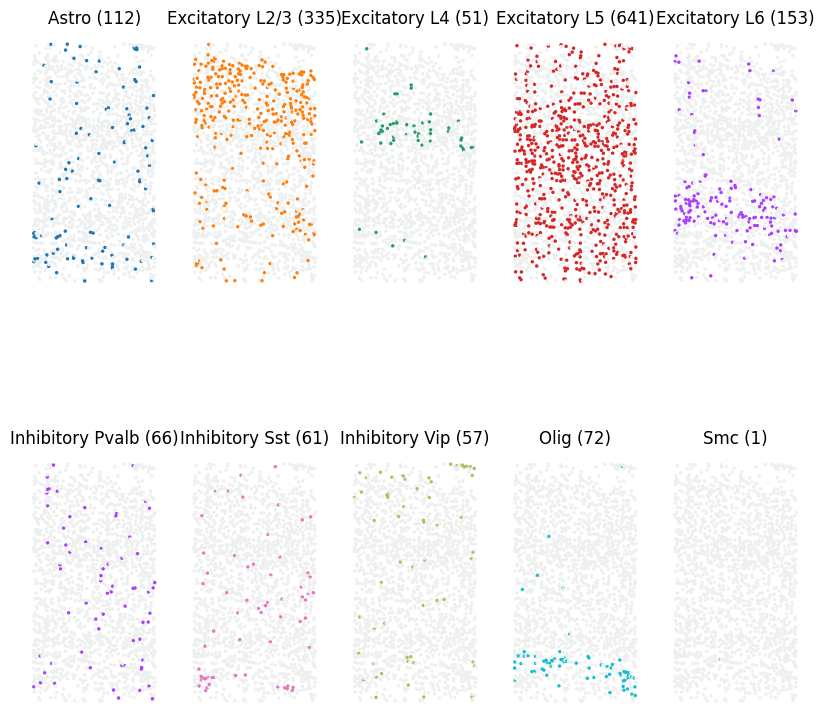

In [216]:
cell_type_palette_dict = dict(zip(sorted(adata10.obs['CoDi'].unique()), cluster_palette))
plot_per_cluster(adata10, obs_id='CoDi', fname=f'dataset10_per_cluster.png')

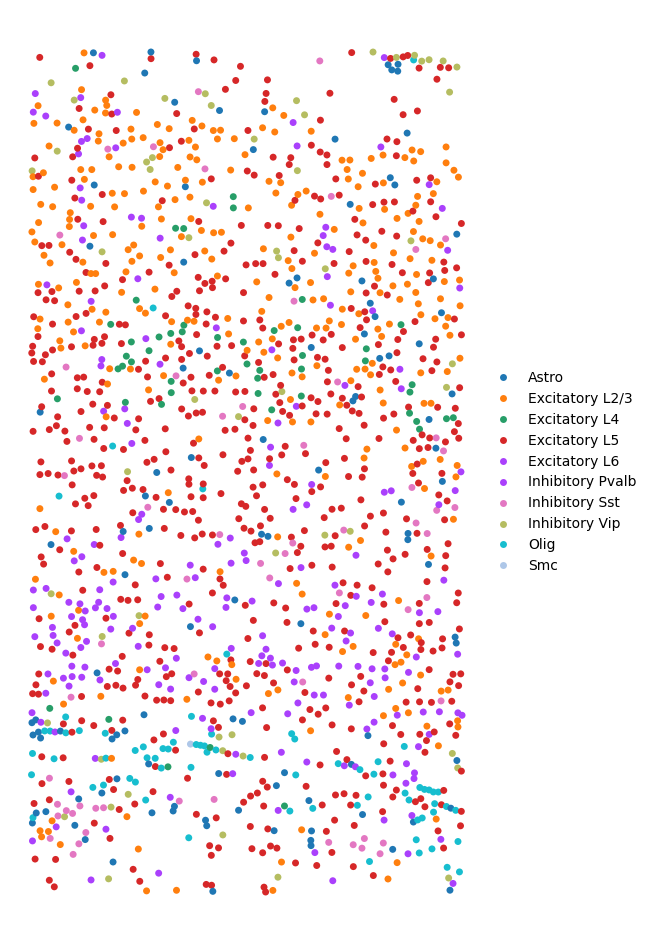

In [217]:
fig, axs = plt.subplots(1, 1, figsize=(8, 12))
plot_spatial(adata10, annotation='CoDi', palette=cell_type_palette_dict, spot_size=200, ax=axs)
# plt.savefig(f'results/{sample}_CoDi_annotated_cell_types.png', dpi=250, bbox_inches='tight')

# plot_per_cluster(adata10, obs_id='CoDi', fname=f'dataset10_per_cluster.png')

In [218]:
adata10.X[1, 1:200].toarray()

array([[  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      , 120.481926,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
        240.96385 ,   0.      ,   0.      , 120.481926,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      , 120.481926,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.